### Precting who survived the Titanic using machine learning

### 1. Problem Definition

Predicting who survived or deceased with using LogisticRegression machine learning model

### 2. Data
I will working with the Titanic data set from kaggle: https://www.kaggle.com/c/titanic/overview

The data contains the following columns:
* Survived: Passengers who survived or deceased
* Pclass   :  Ticket class
* Name     :  Passengers names
* Sex      :  Passengers genders
* Age      :  Passengers ages
* SibSp    :  Spouses aboard the Titanic
* Parch    :  Children aboard the Titanic
* Ticket   :  Ticket number
* Fare     :  Passenger fare
* Cabin    :  Cabin number
* Embarked :  Port of Embarkation

### 3. Features

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data
train = pd.read_csv(r"C:\Users\ERTUĞ GÜNER\Desktop\Python_Projects\Project_Data's\titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis (EDA)

In [3]:
# Checking the missing data
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


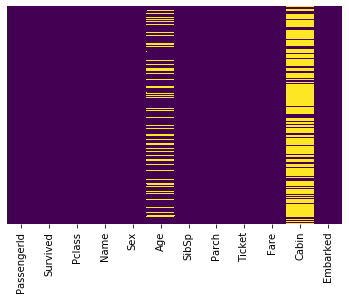

In [5]:
sns.heatmap(train.isna(),yticklabels = False,cbar =False,cmap="viridis");

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

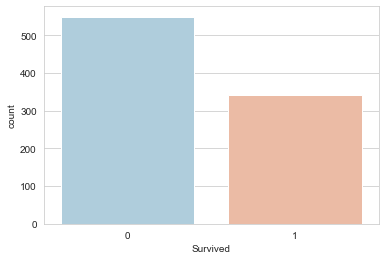

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

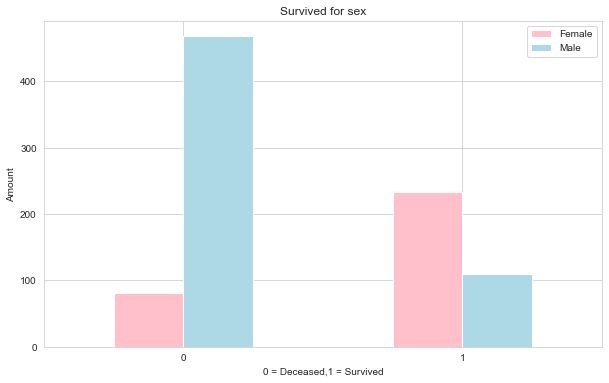

In [8]:
pd.crosstab(train["Survived"],train["Sex"]).plot(kind = "bar",
                                        figsize =(10,6),
                                        color = ["pink","lightblue"])
plt.title("Survived for sex")
plt.xlabel("0 = Deceased,1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);

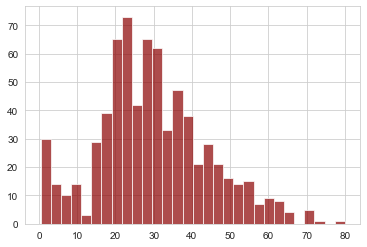

In [9]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7);

**Filling the missing values**

In [10]:
# Filling the "Age" column
train["Age"].fillna(train["Age"].median(),inplace = True)
train["Age"].isna().sum()

0

In [11]:
# Dropping the "Cabin" column
train.drop("Cabin",axis=1,inplace=True)

In [12]:
train.dropna(inplace =True)

In [13]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Converting Categorical Features**

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [15]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [16]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [17]:
train = pd.concat([train,sex,embark],axis=1)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### 4. Modelling

In [19]:
# Split the data into features("X") and labels ("y")
X = train.drop("Survived",axis = 1)
y = train["Survived"]

In [20]:
# Split the train and test  data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =101)

In [30]:
# Instantiate LogisticRegression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter =1000)

In [31]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Make predictions on the test data**

In [32]:
train_pred = model.predict(X_test)

### 5. Evaluation

In [33]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

